# Problem Statement
A real estate company wants to estimate housing prices across Boston neighborhoods using demographic, economic, and infrastructural indicators. This model helps guide investment decisions, pricing strategies, and urban planning efforts.


Goal:
To predict the median house value (MEDV) in various Boston neighborhoods based on features related to housing, crime, infrastructure, and demographics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


# Checking the Descriptive Statistics 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(df.duplicated().sum())

0


# Checking the Distribution of Data

<Figure size 720x504 with 0 Axes>

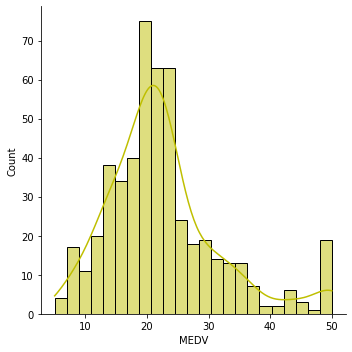

In [7]:
plt.figure(figsize=(10,7))
sns.displot(df['MEDV'],kde=True,color='y')

In [16]:
print(df['MEDV'].skew())

1.1080984082549072


In [9]:
import scipy.stats as sp
import pylab

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

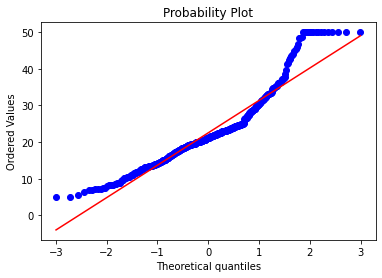

In [17]:
sp.probplot(df['MEDV'],dist='norm',plot=pylab)

<Figure size 720x504 with 0 Axes>

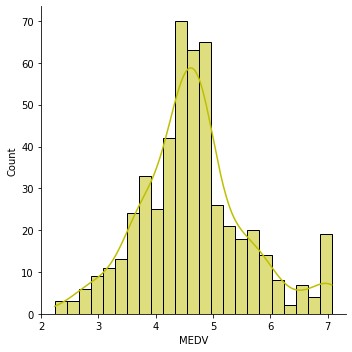

In [21]:
# Data is mildly positively skewed. so we apply the sqrt transformation
plt.figure(figsize=(10,7))
sns.displot(np.sqrt(df['MEDV']),kde=True,color='y')

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

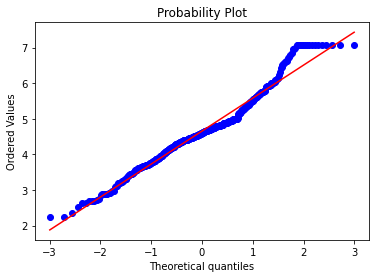

In [22]:
sp.probplot(np.sqrt(df['MEDV']),dist='norm',plot=pylab)

In [23]:
print(np.sqrt(df['MEDV']).skew())

0.43893531933950786


In [33]:
numeric_columns=[i for i in df.describe().columns if i not in ['CHAS']]

In [34]:
numeric_features=[i for i in numeric_columns if i not in ['MEDV']]
print(numeric_features)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


C:\Users\Asus\AppData\Local\Temp\ipykernel_19540\2005681800.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

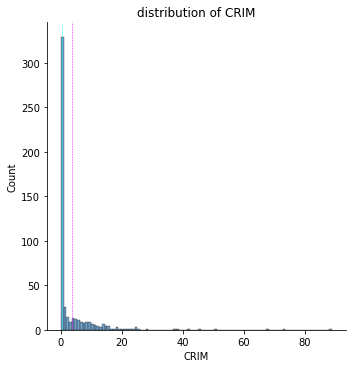

<Figure size 720x432 with 0 Axes>

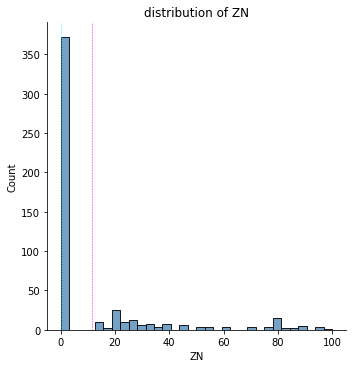

<Figure size 720x432 with 0 Axes>

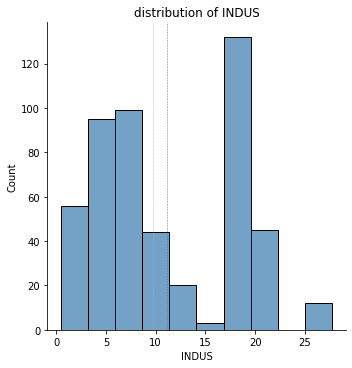

<Figure size 720x432 with 0 Axes>

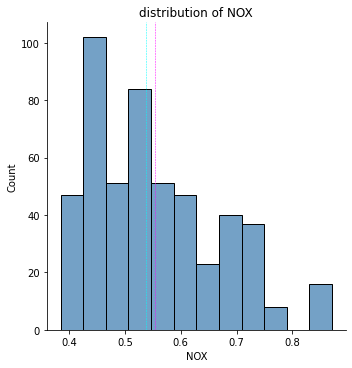

<Figure size 720x432 with 0 Axes>

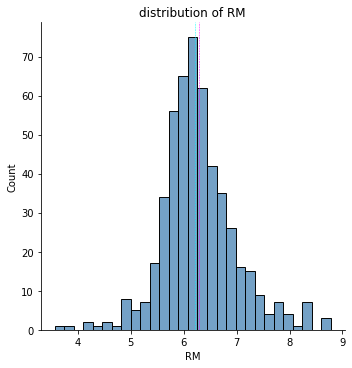

<Figure size 720x432 with 0 Axes>

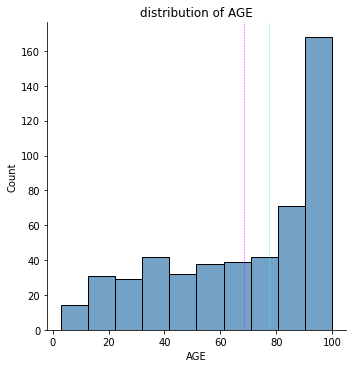

<Figure size 720x432 with 0 Axes>

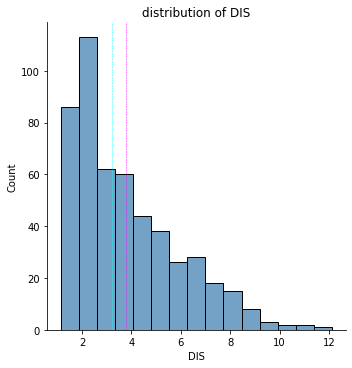

<Figure size 720x432 with 0 Axes>

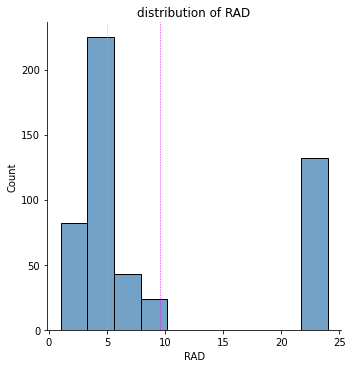

<Figure size 720x432 with 0 Axes>

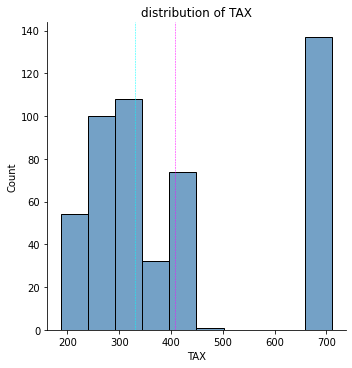

<Figure size 720x432 with 0 Axes>

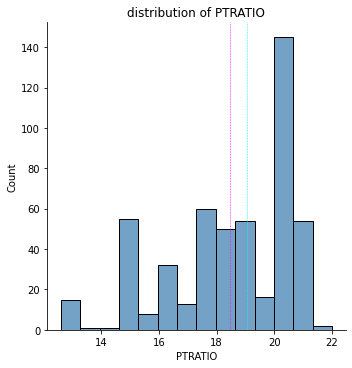

<Figure size 720x432 with 0 Axes>

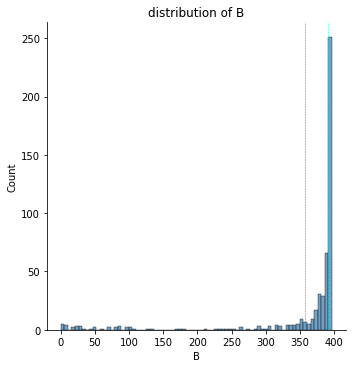

<Figure size 720x432 with 0 Axes>

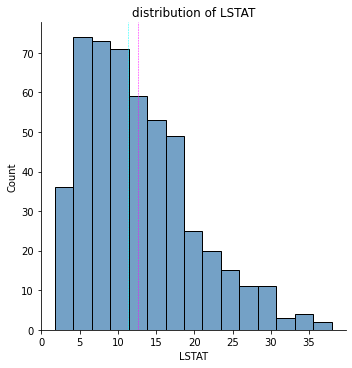

In [26]:
for i in numeric_features:
    plt.figure(figsize=(10,6))
    sns.displot(df[i],color='steelblue')
    plt.title(f'distribution of {i}')
    plt.axvline(np.mean(df[i]),color='magenta',linestyle='dashed',linewidth=0.5)
    plt.axvline(np.median(df[i]),color='cyan',linestyle='dashed',linewidth=0.5)

# Checking the Relationship between Dependent and Independent variables

C:\Users\Asus\AppData\Local\Temp\ipykernel_19540\1333936035.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

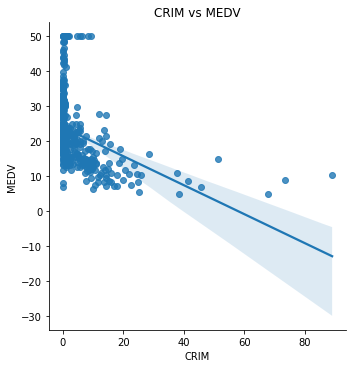

<Figure size 720x432 with 0 Axes>

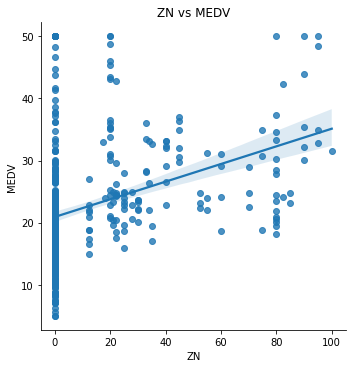

<Figure size 720x432 with 0 Axes>

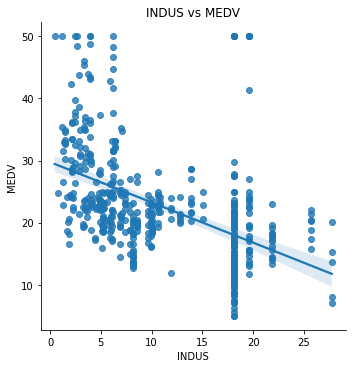

<Figure size 720x432 with 0 Axes>

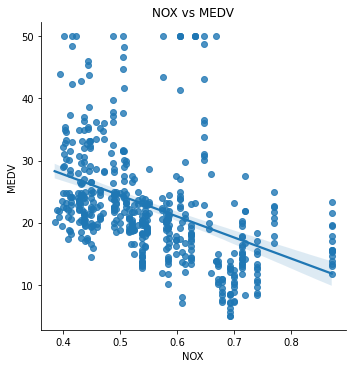

<Figure size 720x432 with 0 Axes>

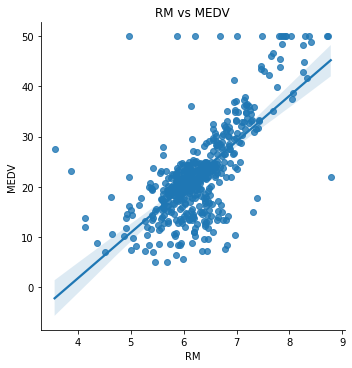

<Figure size 720x432 with 0 Axes>

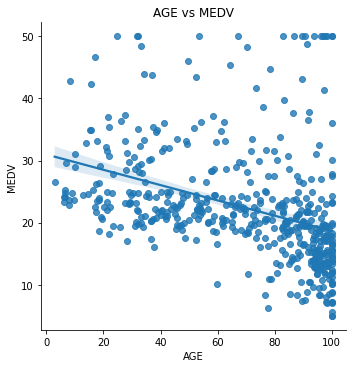

<Figure size 720x432 with 0 Axes>

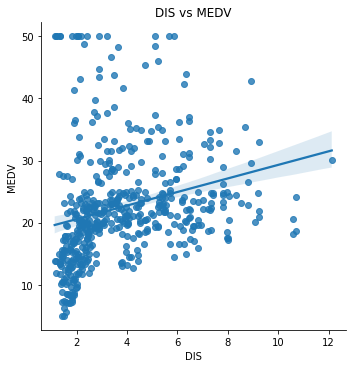

<Figure size 720x432 with 0 Axes>

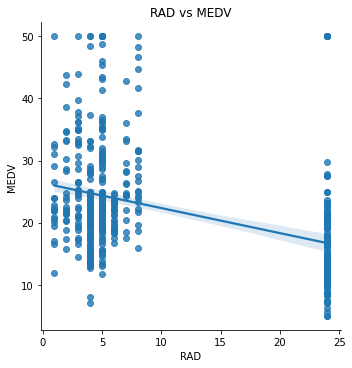

<Figure size 720x432 with 0 Axes>

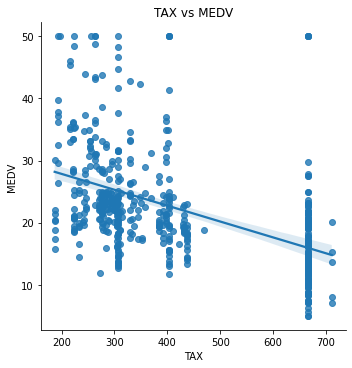

<Figure size 720x432 with 0 Axes>

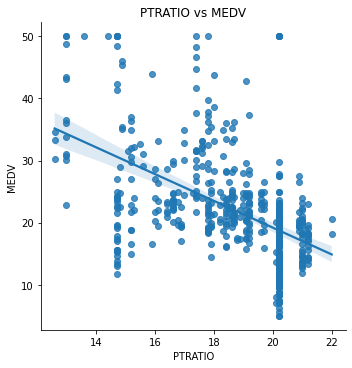

<Figure size 720x432 with 0 Axes>

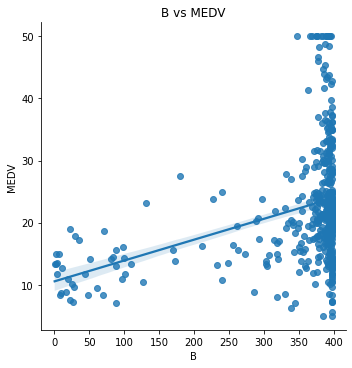

<Figure size 720x432 with 0 Axes>

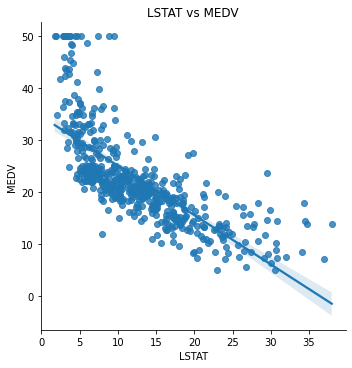

In [27]:
for i in numeric_features:
    plt.figure(figsize=(10,6))
    sns.lmplot(x=i,y='MEDV',data=df)
    plt.title(f'{i} vs MEDV')

# VIF Analysis to check Multicollinearity

<Axes: >

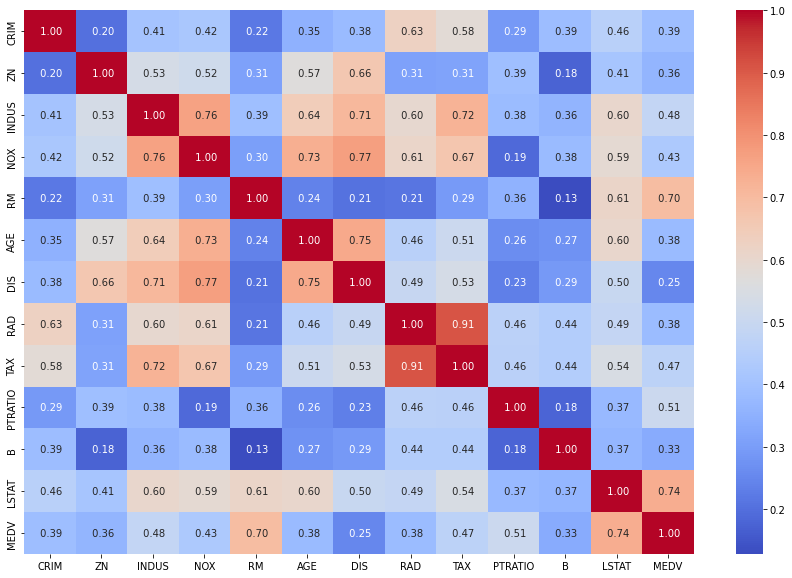

In [35]:
plt.figure(figsize=(15,10))
correlation=df[numeric_columns].corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm',fmt=' .2f')

In [49]:
numeric_features=[i for i in numeric_columns if i not in ['MEDV','NOX','TAX','PTRATIO','AGE','B','DIS']]
print(numeric_features)

['CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'LSTAT']


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def calc_vif(x):
    vif=[]
    for i in range(len(x)):
        vif.append(variance_inflation_factor(df[x],i))
    vif_df=pd.DataFrame({'vif':vif},index=[x])
    return vif_df

In [50]:
calc_vif(numeric_features)

,vif
CRIM,2.033325
ZN,1.770241
INDUS,8.003099
RM,6.401354
RAD,4.742021
LSTAT,6.473328


# Checking the Distribution of the Categorical Variable

<Axes: xlabel='CHAS'>

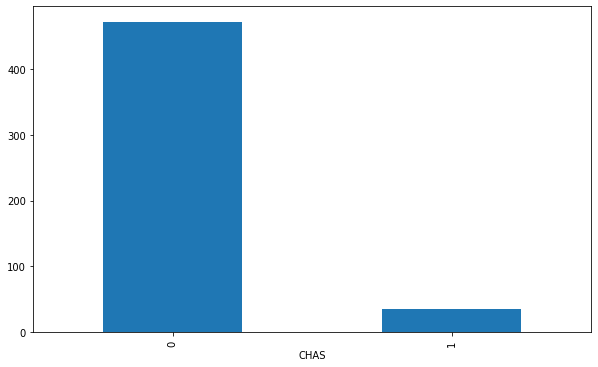

In [51]:
# Distribution of categorical Variable
plt.figure(figsize=(10,6))
df['CHAS'].value_counts().plot(kind='bar')

In [52]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

<Axes: xlabel='CHAS', ylabel='MEDV'>

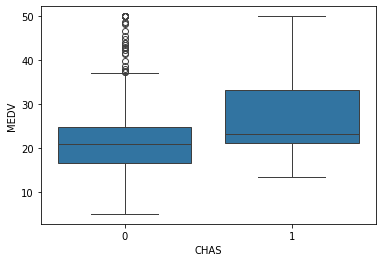

In [53]:
sns.boxplot(x='CHAS',y='MEDV',data=df)

# Last Step of Feature Engineering

In [55]:
features=numeric_features.copy()
features

['CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'LSTAT']

In [56]:
features.append('CHAS')

In [57]:
print(features)

['CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'LSTAT', 'CHAS']


In [61]:
df_pr=df.copy()
df_pr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Rescaling The Input Features

In [64]:
from scipy.stats import zscore

In [65]:
X=df_pr[features].apply(zscore)

In [66]:
y=np.sqrt(df['MEDV'])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [158]:
X_train.shape

(404, 7)

In [70]:
X_test.shape

(102, 7)

# Implementing Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[-0.11997429  0.03114987 -0.03835146  0.26297353 -0.02246634 -0.44954244
  0.08451399]
4.666563240655307


In [73]:
y_pred_train=lr.predict(X_train)

In [74]:
from sklearn.metrics import mean_squared_error,r2_score

In [76]:
mse=mean_squared_error(y_train**2,y_pred_train**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

25.61752632814495
5.06137593230783


In [77]:
print(r2_score(y_train**2,y_pred_train**2))

0.6828783468412034


In [78]:
y_pred=lr.predict(X_test)

In [79]:
mse=mean_squared_error(y_test**2,y_pred**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

27.32245261335136
5.2270883494878255


In [80]:
print(r2_score(y_test**2,y_pred**2))

0.7235335997328501


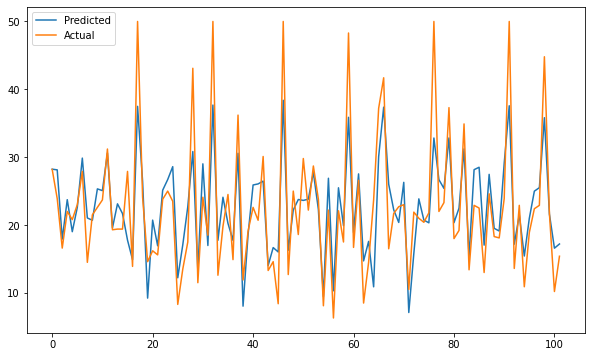

In [84]:
plt.figure(figsize=(10,6))
plt.plot(y_pred**2,label='Predicted')
plt.plot(np.array(y_test**2),label='Actual')
plt.legend()
plt.show()

# Applying GridSearchCV to find the best Parameters

In [95]:
from sklearn.linear_model import ElasticNet

In [96]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_dist={'alpha':[0.01,0.05,0.08,0.1,0.5,0.8,1,1.3,1.5,1.8,2],
               'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               'max_iter':[1000,3000,5000,10000]
           }

In [100]:
ent=ElasticNet()

In [102]:
en_grid=GridSearchCV(ent,param_grid=param_dist,cv=10,verbose=True,n_jobs=-1)
en_grid.fit(X_train,y_train)

Fitting 10 folds for each of 440 candidates, totalling 4400 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.08, 0.1, 0.5, 0.8, 1, 1.3, 1.5,
                                   1.8, 2],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1],
                         'max_iter': [1000, 3000, 5000, 10000]},
             verbose=True)

In [103]:
print(en_grid.best_params_)

{'alpha': 0.08, 'l1_ratio': 0.2, 'max_iter': 1000}


In [104]:
ent=ElasticNet(alpha=0.08,l1_ratio=0.2,max_iter=1000)
ent.fit(X_train,y_train)
print(ent.coef_)
print(ent.intercept_)

[-0.11400348  0.02718246 -0.04849394  0.25269652 -0.0247636  -0.4122144
  0.06973198]
4.666120434642833


In [107]:
y_pred=ent.predict(X_test)

In [108]:
mse=mean_squared_error(y_test**2,y_pred**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

29.34937872825024
5.417506689266774


In [109]:
print(r2_score(y_test**2,y_pred**2))

0.703023838968557


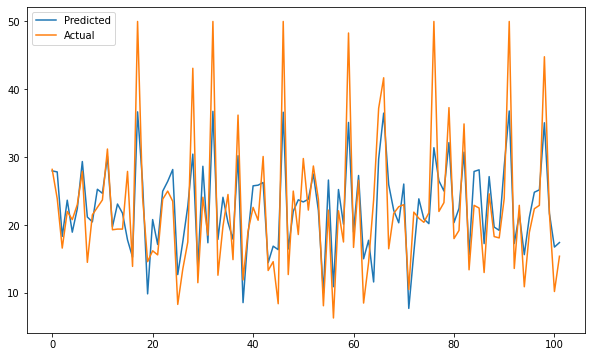

In [111]:
plt.figure(figsize=(10,6))
plt.plot(y_pred**2,label='Predicted')
plt.plot(np.array(y_test**2),label='Actual')
plt.legend()
plt.show()

# Implementing Polynomial Features of Degree 2 to improve score

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
poly=PolynomialFeatures(degree=2)

In [118]:
X_train_trans=poly.fit_transform(X_train)
X_train_trans[0]

array([ 1.        , -0.40405061, -0.48772236, -0.61672651, -0.16473953,
       -0.75292215, -0.95921806, -0.27259857,  0.16325689,  0.19706452,
        0.24918872,  0.06656311,  0.30421865,  0.38757264,  0.11014362,
        0.2378731 ,  0.30079131,  0.08034715,  0.36721697,  0.4678321 ,
        0.13295242,  0.38035159,  0.10159924,  0.46434705,  0.59157521,
        0.16811876,  0.02713911,  0.12403604,  0.15802114,  0.04490776,
        0.56689177,  0.72221653,  0.2052455 ,  0.9200993 ,  0.26148147,
        0.07430998])

In [116]:
X_test_trans=poly.transform(X_test)

In [117]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [119]:
print(lr.coef_)
print(lr.intercept_)

[ 9.95803303e-15  2.63559282e+00  3.34195932e+00  4.77660786e-01
  2.82237086e-01  1.38953669e-02 -5.21834648e-01  1.34663206e-02
  3.23996900e-03  8.66540007e+00  1.60810237e+00  4.99364322e-02
 -3.71198201e-02  9.38790299e-04  4.77391646e-01  3.16592823e-02
  5.73588139e-02  9.11685212e-02 -2.05660574e-01 -1.06436829e-02
 -5.56397737e-02  1.12922486e-01  6.32787848e-02 -8.56448815e-02
 -1.50312347e-01 -1.42153967e-01  3.75200186e-02 -2.25385191e-01
 -9.95361581e-02 -1.08886458e-01  1.33244048e-03 -1.90714139e-01
 -6.44248802e-02  1.13531125e-01 -9.68188050e-02  4.57289218e-02]
5.563213918038174


In [120]:
y_pred=lr.predict(X_test_trans)

In [121]:
mse=mean_squared_error(y_test**2,y_pred**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

10.841542216500525
3.2926497257528813


In [122]:
print(r2_score(y_test**2,y_pred**2))

0.8902982030070181


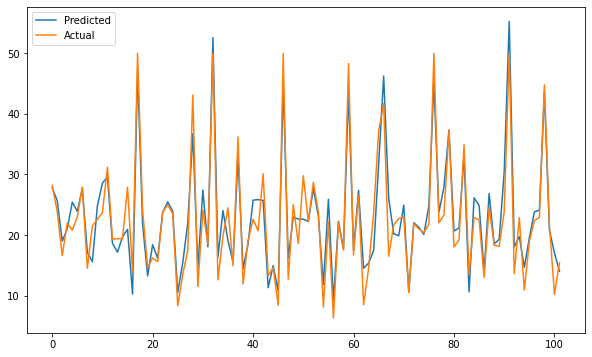

In [123]:
plt.figure(figsize=(10,6))
plt.plot(y_pred**2,label='Predicted')
plt.plot(np.array(y_test**2),label='Actual')
plt.legend()
plt.show()

In [145]:
rd=Ridge(alpha=0.1)

In [146]:
rd.fit(X_train_trans,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.00000000e+00  1.53048727e-02  4.22600272e-01  1.53688829e-01
  2.98985731e-01  2.36619867e-02 -5.06979475e-01  1.32461451e-02
  3.36673135e-03  1.39744938e+00  7.05712710e-01  4.86374637e-02
 -4.38547258e-02  1.04344930e-03  4.69470693e-01 -1.64589739e-03
  3.95800947e-02  8.94824326e-02 -1.71187532e-01  8.27530364e-03
 -4.88640435e-02  1.22500189e-01  6.33761481e-02 -2.05543808e-02
 -1.38735343e-01 -1.33501547e-01  4.19376604e-02 -2.33982239e-01
 -9.39730888e-02 -1.11437329e-01 -6.28147728e-02 -1.92782705e-01
 -6.34257697e-02  1.11143222e-01 -9.36069732e-02  4.49812500e-02]
4.531254352548209


In [147]:
y_pred=rd.predict(X_test_trans)

In [148]:
mse=mean_squared_error(y_test**2,y_pred**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

11.249751975842345
3.3540649927874604


In [149]:
print(r2_score(y_test**2,y_pred**2))

0.8861676703525666


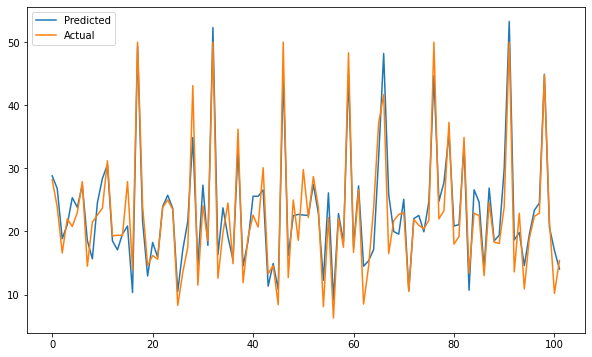

In [150]:
plt.figure(figsize=(10,6))
plt.plot(y_pred**2,label='Predicted')
plt.plot(np.array(y_test**2),label='Actual')
plt.legend()
plt.show()

In [151]:
en_grid=GridSearchCV(ent,param_grid=param_dist,cv=10,verbose=True,n_jobs=-1)
en_grid.fit(X_train_trans,y_train)

Fitting 10 folds for each of 440 candidates, totalling 4400 fits


GridSearchCV(cv=10, estimator=ElasticNet(alpha=0.08, l1_ratio=0.2), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.08, 0.1, 0.5, 0.8, 1, 1.3, 1.5,
                                   1.8, 2],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1],
                         'max_iter': [1000, 3000, 5000, 10000]},
             verbose=True)

In [152]:
print(en_grid.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000}


In [153]:
ent=ElasticNet(alpha=0.01,l1_ratio=0.1,max_iter=1000)
ent.fit(X_train_trans,y_train)
print(ent.coef_)
print(ent.intercept_)

[ 0.         -0.         -0.0199346  -0.07430344  0.30196534  0.01310237
 -0.48739482  0.          0.00253762  0.01397487  0.00458749  0.04732383
 -0.04136693 -0.00396497  0.24818796 -0.00272263  0.02972783  0.0820453
 -0.03470622  0.03450419 -0.02119932  0.1048101   0.04465284  0.01934557
 -0.1239663  -0.09489029  0.03769586 -0.23441837 -0.0901626  -0.09934133
 -0.03225729 -0.18284284 -0.01174151  0.10499499 -0.07071925  0.03661162]
4.542160056238066


In [154]:
y_pred=ent.predict(X_test_trans)

In [155]:
mse=mean_squared_error(y_test**2,y_pred**2)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

12.084680368434405
3.4763026865384443


In [156]:
print(r2_score(y_test**2,y_pred**2))

0.8777193201825688


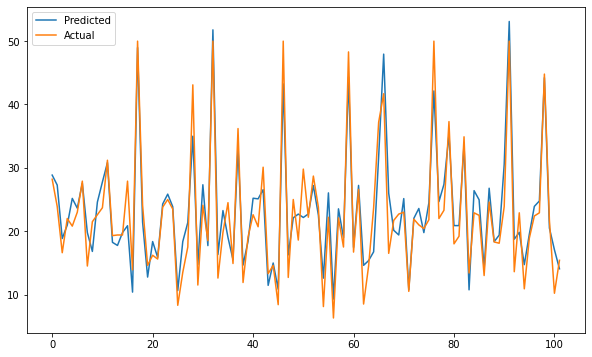

In [157]:
plt.figure(figsize=(10,6))
plt.plot(y_pred**2,label='Predicted')
plt.plot(np.array(y_test**2),label='Actual')
plt.legend()
plt.show()